In [28]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import torch
from torchvision import transforms
import cv2
import time

In [29]:
DATA_DIR = 'data'
SAMPLE_IMG = 'sample/sample.jpg'

### Which processing package I use, cv or PIL ?

In [55]:
%%time
origin_img = Image.open(SAMPLE_IMG).convert('RGB')
np.asarray(origin_img).shape

CPU times: user 2.02 ms, sys: 259 µs, total: 2.28 ms
Wall time: 2.06 ms


(192, 340, 3)

In [40]:
%%time
origin_img_cv = cv2.imread(SAMPLE_IMG)
origin_img_cv = cv2.cvtColor(origin_img_cv, cv2.COLOR_BGR2RGB)
origin_img_cv.shape

CPU times: user 7.12 ms, sys: 0 ns, total: 7.12 ms
Wall time: 5.7 ms


(192, 340, 3)

In [49]:
transform = transforms.Compose([
        transforms.Resize(256),
        ])

CPU times: user 2.05 ms, sys: 0 ns, total: 2.05 ms
Wall time: 1.45 ms


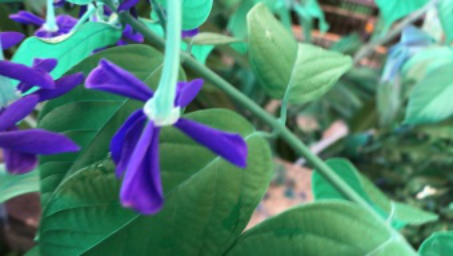

In [50]:
%%time
resized_img = transform(origin_img)
resized_img

In [51]:
transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        ])

CPU times: user 6.01 ms, sys: 0 ns, total: 6.01 ms
Wall time: 6.05 ms


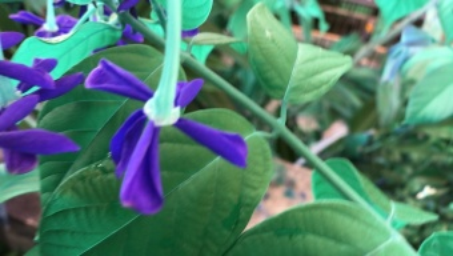

In [52]:
%%time
resized_img = transform(origin_img_cv)
resized_img

事實上,總花費時間是cv較多,因此採用原生torch支援的PIL為主。

In [73]:
transform = transforms.Compose([
        transforms.CenterCrop(192),
        ])

CPU times: user 131 µs, sys: 15 µs, total: 146 µs
Wall time: 113 µs


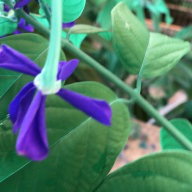

In [75]:
%%time
resized_img = transform(origin_img)
resized_img

In [93]:
transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        ])

CPU times: user 1.35 ms, sys: 0 ns, total: 1.35 ms
Wall time: 854 µs


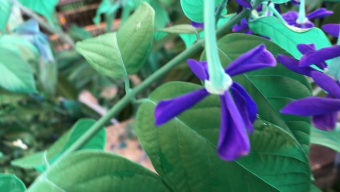

In [94]:
%%time
resized_img = transform(origin_img)
resized_img

In [ ]:
# transform = transforms.Compose([
#         transforms.ToPILImage(),
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
#         ])